# Question 1

## Initialize Data and Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

## Visualize Data

The training data very obviously follows a cubic function. The test data on the other hand is looks somewhat like a normal linear function, but with tails at both ends that break the linear relationship. 

I have not trained a model yet, but my hypothesis would be that the cubic linear regression model would be best suited to this data. It's easier to stretch out a cubic function to be simple than it is to try to make a linear model fit complex data. 

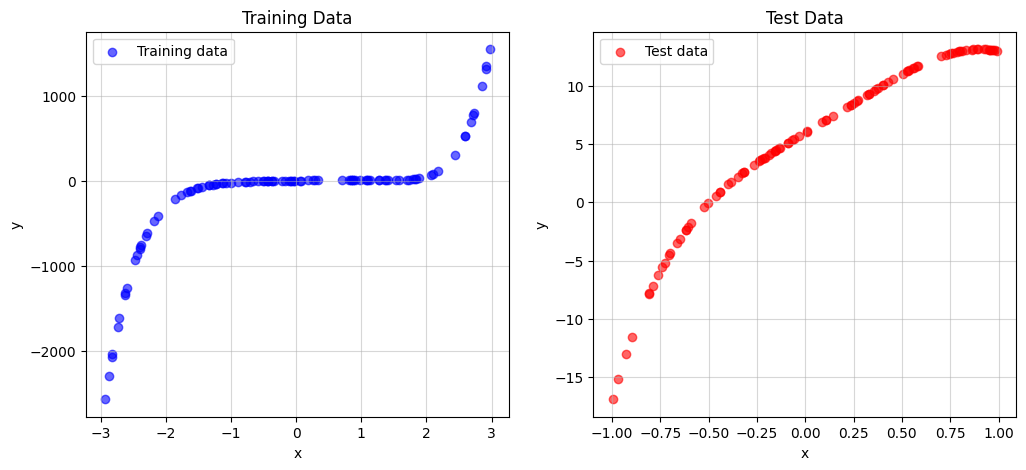

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(x_train, y_train, color='blue', alpha=0.6, label='Training data')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Training Data')
axes[0].legend()
axes[0].grid(True, alpha=0.5)

axes[1].scatter(x_test, y_test, color='red', alpha=0.6, label='Test data')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Test Data')
axes[1].legend()
axes[1].grid(True, alpha=0.5)

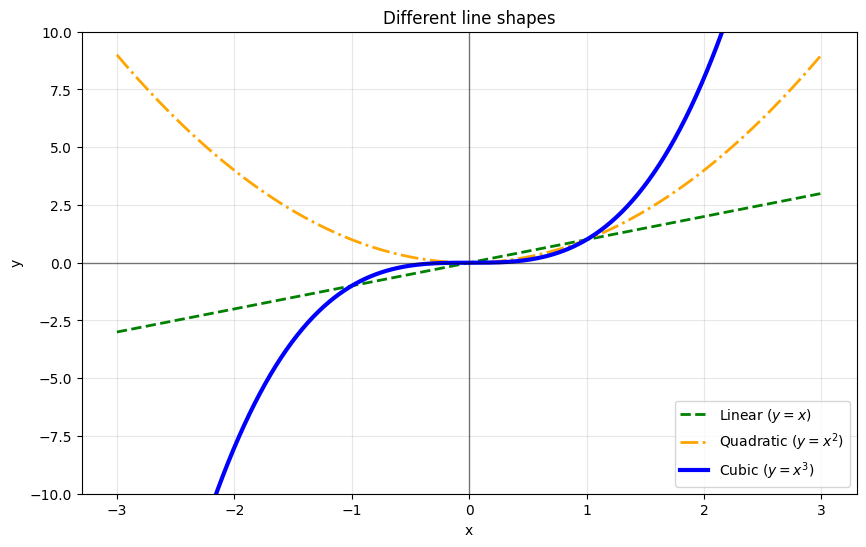

In [4]:
x = np.linspace(-3, 3, 400)
y_linear = x
y_quadratic = x**2
y_cubic = x**3

plt.figure(figsize=(10, 6))
plt.plot(x, y_linear, label='Linear ($y = x$)', color='green', linestyle='--', linewidth=2)
plt.plot(x, y_quadratic, label='Quadratic ($y = x^2$)', color='orange', linestyle='-.', linewidth=2)
plt.plot(x, y_cubic, label='Cubic ($y = x^3$)', color='blue', linewidth=3)

plt.axhline(0, color='black', linewidth=1, alpha=0.5)
plt.axvline(0, color='black', linewidth=1, alpha=0.5)
plt.title('Different line shapes')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-10, 10) 
plt.show()

## Linear Regression Implementation

Reference: I used the following geeks for geeks guide to figure out how to implement a basic linear regression model of degree 1 (https://www.geeksforgeeks.org/machine-learning/ml-normal-equation-in-linear-regression/)

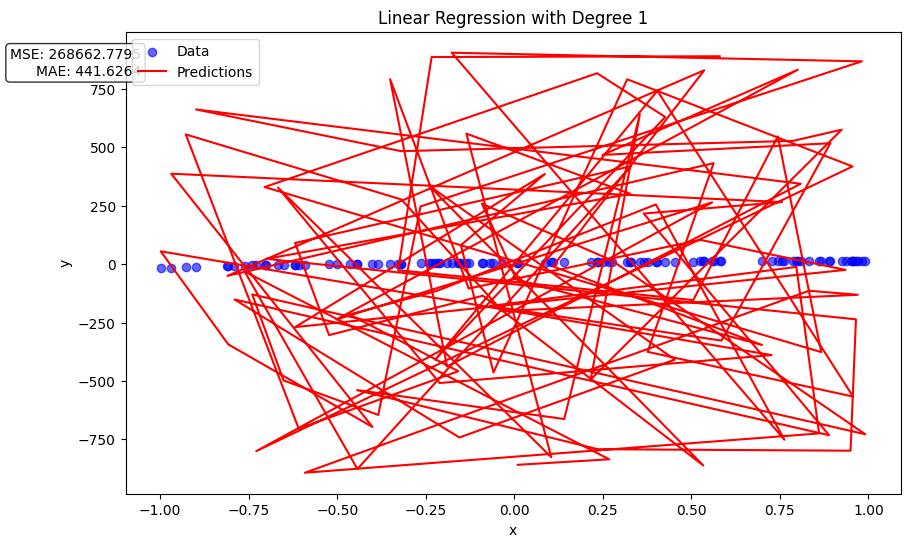

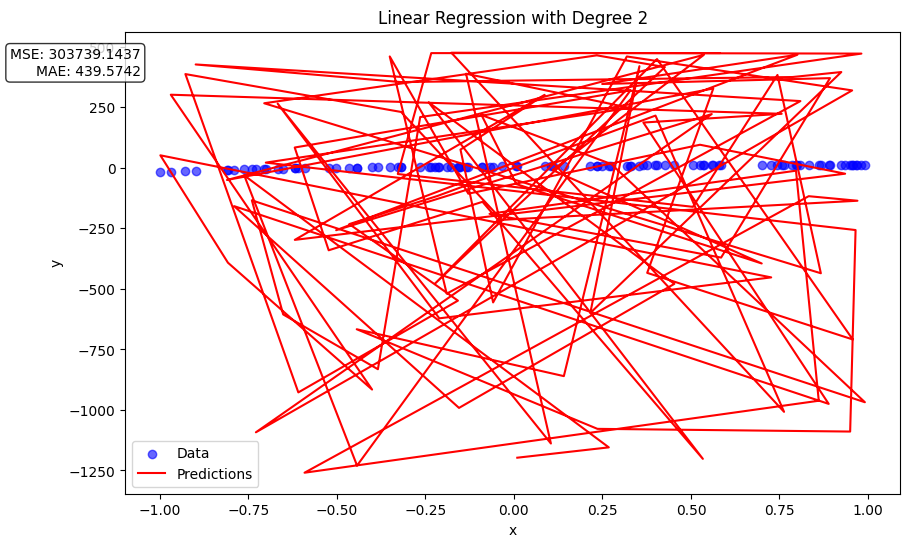

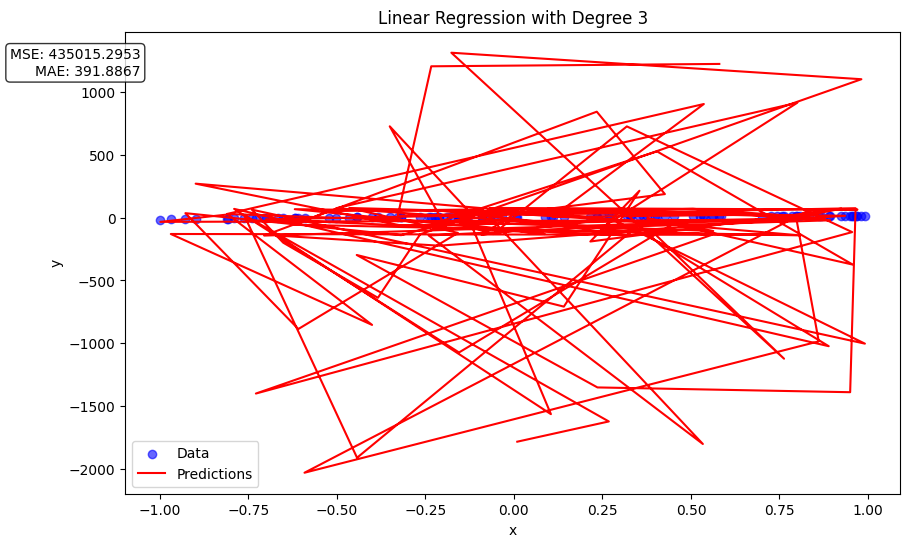

In [19]:
def linear_regression(x_train, y_train, degree):
    if degree == 1:
        x_polynomial = x_train.reshape(-1, 1)
    else:
        x_polynomial = np.column_stack([x_train**i for i in range(1, degree + 1)])
        
    x_t = np.transpose(x_polynomial)
    x_t_x = np.dot(x_t, x_polynomial)
    x_t_y = np.dot(x_t, y_train)
    theta = np.linalg.solve(x_t_x, x_t_y)
    
    predictions = np.dot(x_polynomial, theta)
    return predictions

def evaluate_and_plot(predictions, x_test, y_test, degree):
    predictions = predictions.reshape(-1)
    y_test = y_test.reshape(-1)
    residuals = predictions - y_test
    
    mse = np.mean(residuals ** 2)
    mae = np.mean(np.abs(residuals))
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x_test, y_test, color='blue', alpha=0.6, label='Data')
    plt.plot(x_test, predictions, color='red', label='Predictions')
    plt.title(f'Linear Regression with Degree {degree}')
    plt.xlabel('x')
    plt.ylabel('y')

    ax = plt.gca()
    ax.text(
        0.02, 0.90,
        f"MSE: {mse:.4f}\nMAE: {mae:.4f}",
        transform=ax.transAxes,
        va="bottom",
        ha="right",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.8),
    )
    plt.legend()
    plt.show()

for degree in [1, 2, 3]:
    predictions = linear_regression(x_train, y_train, degree)
    evaluate_and_plot(predictions, x_test, y_test, degree)


# Question 2